# Reinforcement learning

## Thompson Sampling 

* A probabilistic algorithm

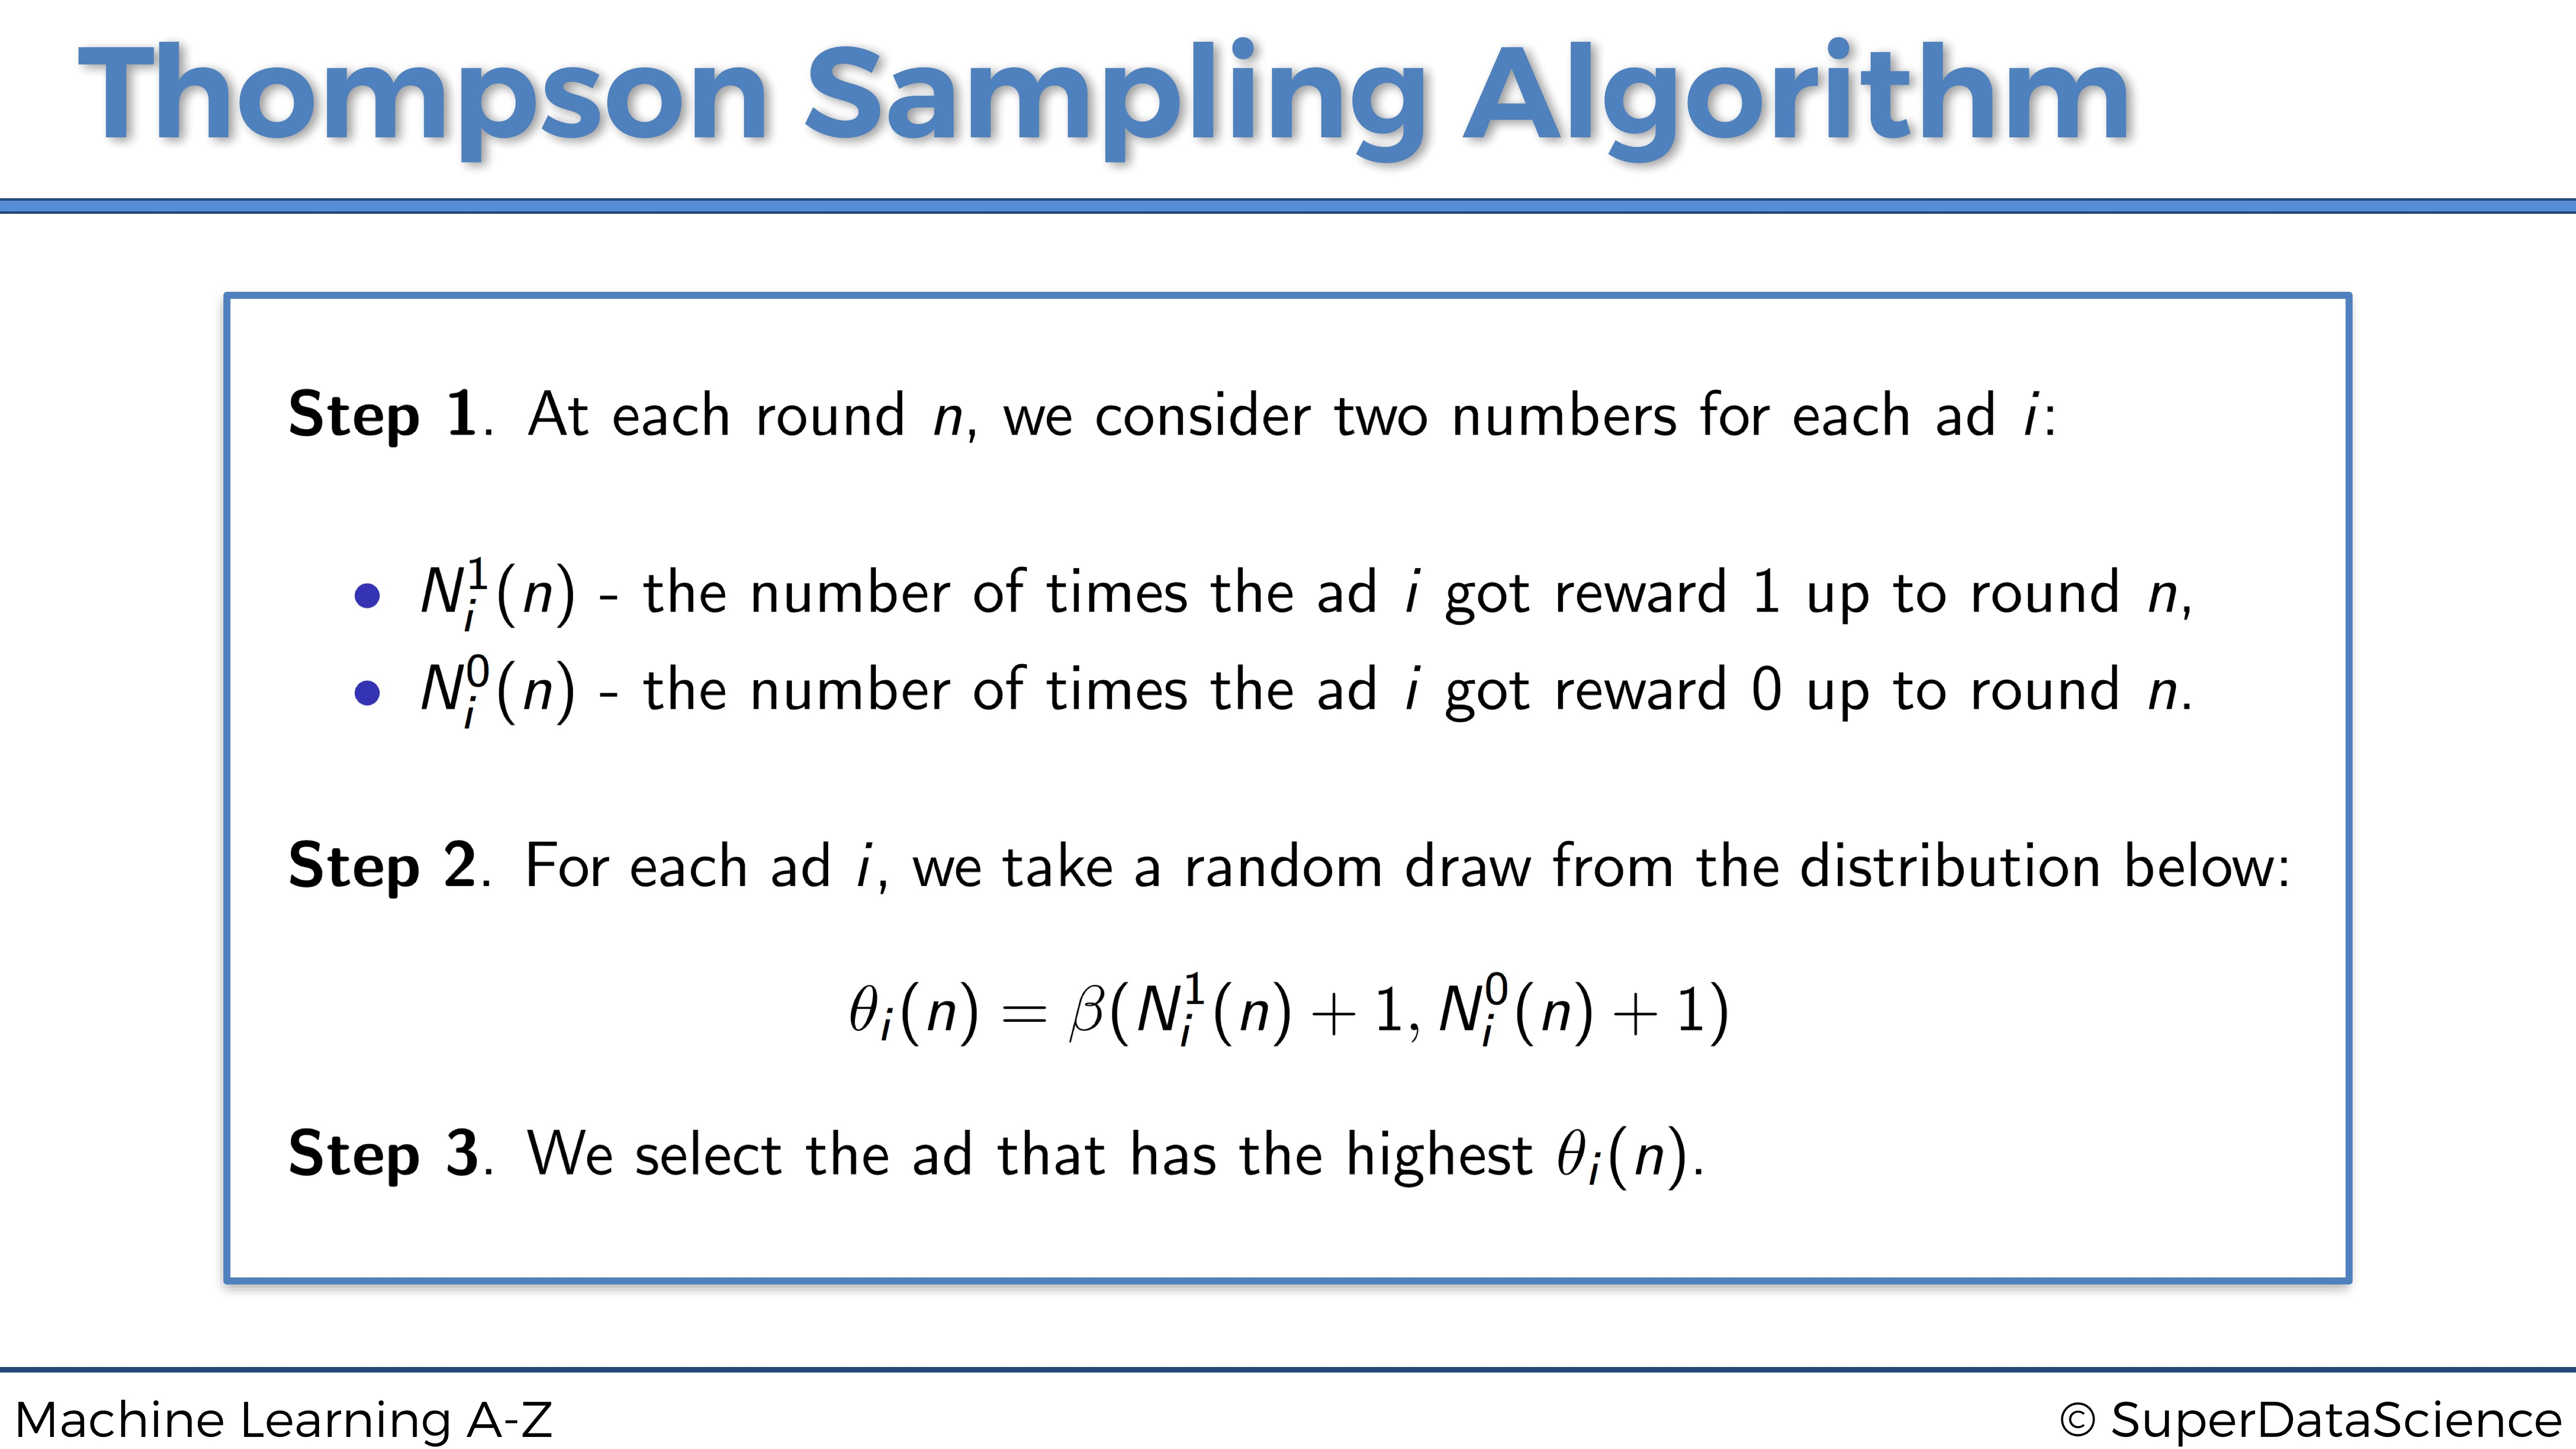

## Data preprocessing

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing the algorithm

In [14]:
import random
N = 500
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1, number_of_rewards_0[i] + 1)
        if(random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    total_reward += reward

* The algorithm also works with lower number of rounds
* Total rows are 10000
* Predicted right results at n, as low as 500

## Visualization of results

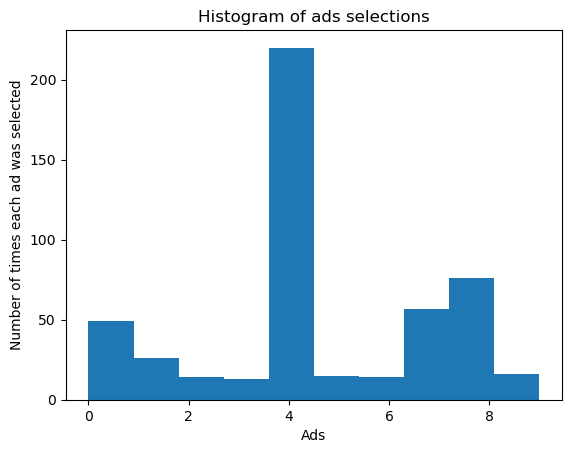

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()